## **Import the libraries and load the datas**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# **Missing Data**

Let's look all the missing data we have

In [3]:
train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's check the Embarked

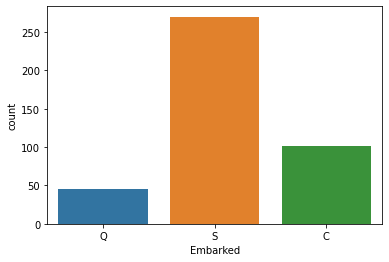

In [30]:
sns.countplot(dataset['Embarked'])

How we can see, the most commun is the Embarked S, it shows frequentely so we will fill the missing feactures with the S

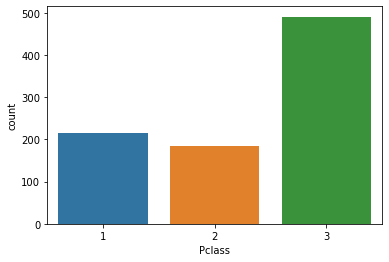

In [25]:
sns.barplot('Pclass', 'Survived', data = train)

In [6]:
train = train.fillna({"Embarked": "S"})

We will make a One Hot Encoding because is avaliable for Sex and Embarked

In [12]:
train = pd.get_dummies(train, columns = ['Sex'])
train = pd.get_dummies(train, columns = ['Embarked'])
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


And for Age: 

In [16]:
data = [train, test]
for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

Cabin we will drop out the column

In [17]:
train.drop('Cabin',axis = 1,inplace = True)

In [21]:
train.drop('Ticket',axis = 1,inplace = True)

In [36]:
train.drop('Name',axis = 1,inplace = True)

In [57]:
train.drop('PassengerId',axis = 1,inplace = True)

Let's divide in train and test for the training of the model

In [104]:
train_c = train[['Survived']]
train_f = train.drop(['Survived'], axis = 1)
train_f.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7.2500,0,1,0,0,1
1,1,38,1,0,71.2833,1,0,1,0,0
2,3,26,0,0,7.9250,1,0,0,0,1
3,1,35,1,0,53.1000,1,0,0,0,1
4,3,35,0,0,8.0500,0,1,0,0,1


## The Decision Tree Model

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [288]:
X_train, X_test, Y_train, Y_test = train_test_split(train_f, train_c, test_size = 0.20,random_state = 42)

In [291]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, Y_train)
export_graphviz(clf, out_file = 'Tree.dot')

pred = clf.predict(X_test)

In [292]:
hit_rate = accuracy_score(Y_test, pred)
error_rate = 1 - hit_rate

In [293]:
hit_rate * 100

78.77094972067039

In [294]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [295]:
print(confusion_matrix(Y_test,pred))

[[87 18]
 [20 54]]


In [298]:
sub = pd.DataFrame({ "PassengerId": test['PassengerId'], "Survived": pred})

sub.head()

sub.to_csv('MySub.csv', index = False)